# Algoritm for ECG (Electrocardiogram) Classification

### The purpose of this supervised learning algoritm is to classify with high accuracy a ECG signal into different categories:
    0 - Normal
    1 - Superventricular Premature Beat
    2 - Premature Ventricular Contraction
    3 - Fusion of ventricular and normal beat
    4 - Unclassifiable beat

### The model is built using an RNN network with Conv1D, LSTM and Dense layers. Dataset pulled from: https://www.physionet.org/content/mitdb/1.0.0/ 

In [47]:
# Library Loading

import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Input, Model
from keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score

In [48]:
# Reading files and building dataset

TRAINING_FILE = './data/mitbih_train.csv'
TEST_FILE = './data/mitbih_test.csv'

with open(TRAINING_FILE) as csv_file:
    data = np.loadtxt(csv_file, delimiter=',')
x = data[:,0:-1]
y = data[:,-1]

In [49]:
with open(TEST_FILE) as csv_file:
    data = np.loadtxt(csv_file, delimiter=',')
x_test = data[:,0:-1]
y_test = data[:,-1]

In [50]:
#Verifying dataset properties

print(f'x shape: {x.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y shape: {y.shape}')
print(f'y_test shape: {y_test.shape}')

x shape: (87554, 187)
x_test shape: (21892, 187)
y shape: (87554,)
y_test shape: (21892,)


In [51]:
num_classes = np.unique(y)
for i in range(len(num_classes)):
    print(f'Number of elements in class {i} : {np.count_nonzero(y==i)}')

Number of elements in class 0 : 72471
Number of elements in class 1 : 2223
Number of elements in class 2 : 5788
Number of elements in class 3 : 641
Number of elements in class 4 : 6431


In [52]:
index_c1 = np.argwhere(y==1)[0].item()
index_c2 = np.argwhere(y==2)[0].item()
index_c3 = np.argwhere(y==3)[0].item()
index_c4 = np.argwhere(y==4)[0].item()

In [53]:
index = index_c1, index_c2, index_c3, index_c4
index

(72471, 74694, 80482, 81123)

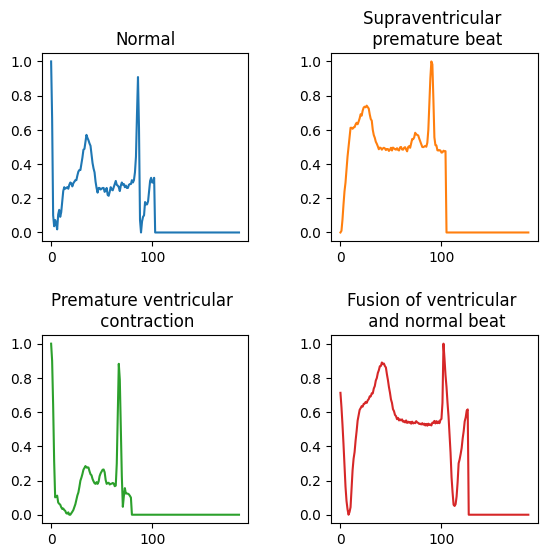

In [54]:
# Ploting examples of the first 4 categories

t = np.arange(0, 187)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(t, x[index[0]], 'tab:blue')
axs[0, 0].set_title('Normal')
axs[0, 1].plot(t, x[index[1]], 'tab:orange')
axs[0, 1].set_title('Supraventricular \n premature beat')
axs[1, 0].plot(t, x[index[2]], 'tab:green')
axs[1, 0].set_title('Premature ventricular \n contraction')
axs[1, 1].plot(t, x[index[3]], 'tab:red')
axs[1, 1].set_title('Fusion of ventricular \n and normal beat')
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.4)

In [55]:
#Splitting training data into training and validation

x_train,x_val,y_train,y_val = train_test_split(x,y,stratify=y,train_size=0.75)
print("The shape of training data : ",x_train.shape,y_train.shape)
print("The shape of validation data : ",x_val.shape,y_val.shape)

The shape of training data :  (65665, 187) (65665,)
The shape of validation data :  (21889, 187) (21889,)


In [56]:
# Parameters

window_size = 187
batch_size = 32
shuffle_buffer_size = 1000

In [57]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='same',
                      input_shape=[window_size,1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(5, activation = "softmax"),
])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 187, 64)           256       
                                                                 
 lstm_2 (LSTM)               (None, 187, 64)           33024     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 30)                1950      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 68,619
Trainable params: 68,619
Non-trai

In [58]:
model.compile(loss='categorical_crossentropy',
              optimizer= 'Adam',
              metrics=['accuracy'])

In [59]:
# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(y_train, num_classes=5)

In [60]:
model = tf.keras.models.load_model('ecg.h5')

In [30]:
history = model.fit(x_train, ys, epochs=20, verbose=1)

Epoch 1/20
2053/2053 [==============================] - 340s 166ms/step - loss: 0.0297 - accuracy: 0.9903
Epoch 2/20
2053/2053 [==============================] - 355s 173ms/step - loss: 0.0274 - accuracy: 0.9912
Epoch 3/20
2053/2053 [==============================] - 360s 175ms/step - loss: 0.0271 - accuracy: 0.9918
Epoch 4/20
2053/2053 [==============================] - 356s 173ms/step - loss: 0.0284 - accuracy: 0.9906
Epoch 5/20
2053/2053 [==============================] - 362s 176ms/step - loss: 0.0275 - accuracy: 0.9909
Epoch 6/20
2053/2053 [==============================] - 371s 181ms/step - loss: 0.0276 - accuracy: 0.9912
Epoch 7/20
2053/2053 [==============================] - 374s 182ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 8/20
2053/2053 [==============================] - 367s 179ms/step - loss: 0.0254 - accuracy: 0.9917
Epoch 9/20
2053/2053 [==============================] - 369s 180ms/step - loss: 0.0248 - accuracy: 0.9917
Epoch 10/20
2053/2053 [=======================

In [35]:
model.save('ecg.h5')

In [61]:
ys_val = tf.keras.utils.to_categorical(y_val, num_classes=5)
ys_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [62]:
#Validation Set Model Performance Metrics

y_pre_val = model.predict(x_val)
y_pred_val = np.zeros(y_pre_val.shape[0])
for i in range(y_pred_val.shape[0]):
    y_pred_val[i] = np.argmax(y_pre_val[i])
y_pred_val = tf.keras.utils.to_categorical(y_pred_val)
b1 = accuracy_score(y_true=ys_val,y_pred=y_pred_val)
print("\nThe accuracy score of model on the dev set is:  "+str(b1))
print('\n --------- Classification Report ------------ \n')
print(classification_report(y_true=ys_val,y_pred=y_pred_val))

685/685 [==============================] - 52s 72ms/step

The accuracy score of model on the dev set is:  0.9932386130019645

 --------- Classification Report ------------ 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18118
           1       0.98      0.88      0.92       556
           2       0.99      0.98      0.98      1447
           3       0.92      0.89      0.90       160
           4       1.00      1.00      1.00      1608

   micro avg       0.99      0.99      0.99     21889
   macro avg       0.98      0.95      0.96     21889
weighted avg       0.99      0.99      0.99     21889
 samples avg       0.99      0.99      0.99     21889



In [42]:
#Test Set Model Performance Metrics

y_pre = model.predict(x_test)
y_pred = np.zeros(y_pre.shape[0])
for i in range(y_pred.shape[0]):
    y_pred[i] = np.argmax(y_pre[i])
y_pred = tf.keras.utils.to_categorical(y_pred)
b1 = accuracy_score(y_true=ys_test,y_pred=y_pred)
print("\nThe accuracy score of model on the test set is:  "+str(b1))
print('\n --------- Classification Report ------------ \n')
print(classification_report(y_true=ys_test,y_pred=y_pred))

685/685 [==============================] - 48s 70ms/step
The accuracy score of model on the test set is:  0.984469212497716

 --------- Classification Report ------------ 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18118
           1       0.94      0.72      0.82       556
           2       0.96      0.96      0.96      1448
           3       0.84      0.75      0.79       162
           4       0.99      0.98      0.99      1608

   micro avg       0.98      0.98      0.98     21892
   macro avg       0.95      0.88      0.91     21892
weighted avg       0.98      0.98      0.98     21892
 samples avg       0.98      0.98      0.98     21892

